In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout

# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

In [2]:
loans = pd.read_csv('loans.csv', low_memory = False)
# loans = pd.read_csv("accepted_2007_to_2018Q4.csv.gz", compression='gzip', low_memory=True)
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68407277,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68355089,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300

In [3]:
loans.shape

(2260701, 151)

In [4]:
loans['loan_status'].value_counts(dropna=False)

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
NaN                                                         33
Name: loan_status, dtype: int64

In [6]:
# keep the loans with status "Fully Paid" or "Charged Off."
loans = loans.loc[loans['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [7]:
loans.shape

(1345310, 151)

In [8]:
loans['loan_status'].value_counts(dropna=False)

Fully Paid     1076751
Charged Off     268559
Name: loan_status, dtype: int64

In [9]:
loans['loan_status'].value_counts(normalize=True, dropna=False)

Fully Paid     0.800374
Charged Off    0.199626
Name: loan_status, dtype: float64

In [10]:
loans.isnull().sum().sort_values(ascending=False).head(100)

member_id                                     1345310
next_pymnt_d                                  1345310
orig_projected_additional_accrued_interest    1341551
hardship_start_date                           1339556
hardship_end_date                             1339556
payment_plan_start_date                       1339556
hardship_length                               1339556
hardship_dpd                                  1339556
hardship_loan_status                          1339556
hardship_last_payment_amount                  1339556
hardship_payoff_balance_amount                1339556
hardship_amount                               1339556
hardship_status                               1339556
hardship_reason                               1339556
hardship_type                                 1339556
deferral_term                                 1339556
sec_app_mths_since_last_major_derog           1338665
sec_app_revol_util                            1327008
revol_bal_joint             

In [11]:
cols_to_drop = loans.isnull().sum().sort_values(ascending=False).head(95).index
loans = loans.drop(columns=cols_to_drop)
loans.shape

(1345310, 56)

In [12]:
nulls = loans.isnull().sum().sort_values(ascending=False)
nulls_percentage = (nulls/loans.shape[0]*100)
nulls_percentage.head(15)

last_pymnt_d                  0.171931
revol_util                    0.063703
pub_rec_bankruptcies          0.051810
dti                           0.027800
collections_12_mths_ex_med    0.004163
chargeoff_within_12_mths      0.004163
last_credit_pull_d            0.004088
tax_liens                     0.002899
zip_code                      0.000074
inq_last_6mths                0.000074
issue_d                       0.000000
addr_state                    0.000000
delinq_2yrs                   0.000000
earliest_cr_line              0.000000
purpose                       0.000000
dtype: float64

In [13]:
loans = loans.dropna()
loans.shape

(1341026, 56)

In [14]:
#remove cloumns
cols_to_drop = ['out_prncp', 'out_prncp_inv', 'policy_code', 'id', 'pymnt_plan', 'hardship_flag', 'issue_d', 'url', 'last_pymnt_d', 
                'last_credit_pull_d', 'zip_code', 'addr_state', 'earliest_cr_line']
loans = loans.drop(columns=cols_to_drop)
loans.shape

(1341026, 43)

In [15]:
#remove duplicated information.
cols_to_drop = ['fico_range_low', 'funded_amnt_inv', 'funded_amnt', 'total_pymnt_inv', 'total_pymnt', 'installment', 
                'collection_recovery_fee', 'total_rec_prncp', 'last_fico_range_low']
loans = loans.drop(columns=cols_to_drop)
loans.shape

(1341026, 34)

In [16]:
loans['term'].value_counts(dropna=False)

 36 months    1017398
 60 months     323628
Name: term, dtype: int64

In [17]:
loans['term'] = loans['term'].apply(lambda s: np.int8(s.split()[0]))
loans['term'].value_counts(normalize=True)

36    0.758671
60    0.241329
Name: term, dtype: float64

In [18]:
loans.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

term
36    0.158525
60    0.323201
Name: loan_status, dtype: float64

In [19]:
print(sorted(loans['sub_grade'].unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


In [20]:
loans.drop('grade', axis=1, inplace=True)

In [21]:
loans = pd.get_dummies(loans, columns = ['sub_grade', 'home_ownership', 'verification_status', 'purpose', 
                                       'initial_list_status', 'application_type', 'disbursement_method', 'debt_settlement_flag'], prefix='', prefix_sep='', drop_first=True)

In [22]:
loans.shape

(1341026, 83)

In [23]:
#  0 indicates fully paid and 1 indicates charge-off
loans['charged_off'] = (loans['loan_status'] == 'Charged Off').apply(np.uint8)
loans.drop('loan_status', axis=1, inplace=True)

In [24]:
X, y = loans.drop('charged_off', axis=1), loans['charged_off']
kf = KFold(n_splits=10, random_state=42, shuffle=True)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index],
    y_train, y_test = y.iloc[train_index], y.iloc[test_index],

In [25]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [26]:
from xgboost.sklearn import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

[18:52:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Result:
Accuracy Score: 99.12%
_______________________________________________
CLASSIFICATION REPORT:
                       0              1  accuracy     macro avg  weighted avg
precision       0.992588       0.985495  0.991202  9.890414e-01  9.911802e-01
recall          0.996466       0.969941  0.991202  9.832035e-01  9.912024e-01
f1-score        0.994523       0.977656  0.991202  9.860896e-01  9.911760e-01
support    967428.000000  239496.000000  0.991202  1.206924e+06  1.206924e+06
_______________________________________________
Confusion Matrix: 
 [[964009   3419]
 [  7199 232297]]

Test Result:
Accuracy Score: 98.99%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1 

Area under curve: 0.9990257916587244


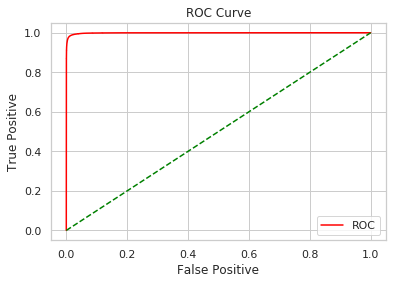

In [63]:
from sklearn.metrics import roc_curve,auc

prob = xgb_clf.predict_proba(X_test)
prob = prob[:, 1]
fper, tper, thresholds = roc_curve(y_test, prob)
roc_auc_gb = auc(fper, tper)
print('Area under curve:', roc_auc_gb)
plt.plot(fper, tper, color = 'red', label = 'ROC')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.plot([0, 1], [0, 1], color = 'green', linestyle = '--')
# 左上角的圖例
plt.legend()
plt.title("ROC Curve")
plt.show()

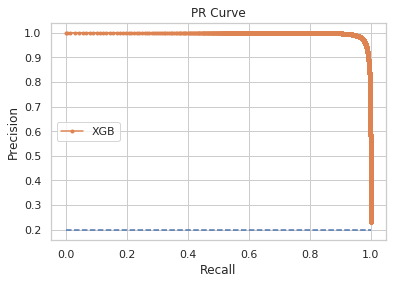

In [62]:
from sklearn.metrics import precision_recall_curve
prob = xgb_clf.predict_proba(X_test)
prob = prob[:, 1]
predict = xgb_clf.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, prob)
no_skill = len(y_test[y_test == 1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker = '.', label = 'XGB')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title("PR Curve")
plt.show()

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_booster = GradientBoostingClassifier(max_depth=7, n_estimators=200, random_state=42,learning_rate=0.1)
gradient_booster.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [59]:
gradient_booster.fit(X_train,y_train)
y_train_pred = gradient_booster.predict(X_train)
y_test_pred = gradient_booster.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 99.09%
_______________________________________________
CLASSIFICATION REPORT:
                       0              1  accuracy     macro avg  weighted avg
precision       0.992312       0.985177   0.99092  9.887448e-01  9.908964e-01
recall          0.996391       0.968818   0.99092  9.826047e-01  9.909199e-01
f1-score        0.994348       0.976929   0.99092  9.856384e-01  9.908912e-01
support    967428.000000  239496.000000   0.99092  1.206924e+06  1.206924e+06
_______________________________________________
Confusion Matrix: 
 [[963937   3491]
 [  7468 232028]]

Test Result:
Accuracy Score: 98.94%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.991528      0.980330  0.989359       0.985929       0.989325
recall          0.995256      0.965282  0.989359       0.980269       0.989359
f1-score        0.993389      0.972748  0.989359      

Area under curve: 0.9988137950798488


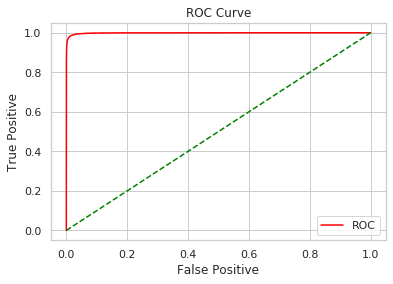

In [65]:
y_score = gradient_booster.predict_proba(X_test)
y_score = y_score[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_score)
roc_auc_gb = auc(fpr_gb, tpr_gb)
print('Area under curve:', roc_auc_gb)
plt.plot(fpr_gb, tpr_gb, color = 'red', label = 'ROC')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.plot([0, 1], [0, 1], color = 'green', linestyle = '--')
plt.legend()
plt.title("ROC Curve")
plt.show()

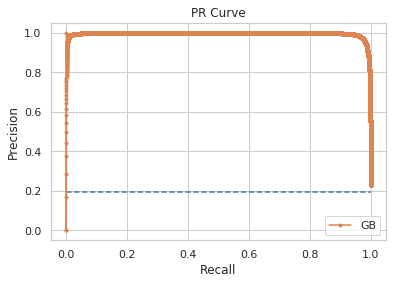

In [67]:
y_score = gradient_booster.predict_proba(X_test)
y_score = y_score[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
no_skill = len(y_test[y_test == 1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker = '.', label = 'GB')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title("PR Curve")
plt.show()

In [68]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth = 7)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=7)

In [69]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 95.94%
_______________________________________________
CLASSIFICATION REPORT:
                       0              1  accuracy     macro avg  weighted avg
precision       0.953174       0.991958  0.959395  9.725658e-01  9.608699e-01
recall          0.998391       0.801876  0.959395  9.001331e-01  9.593951e-01
f1-score        0.975258       0.886846  0.959395  9.310520e-01  9.577142e-01
support    967428.000000  239496.000000  0.959395  1.206924e+06  1.206924e+06
_______________________________________________
Confusion Matrix: 
 [[965871   1557]
 [ 47450 192046]]

Test Result:
Accuracy Score: 95.95%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.953533      0.991048  0.959501       0.972290       0.960913
recall          0.998227      0.801395  0.959501       0.899811       0.959501
f1-score        0.975368      0.886188  0.959501      

Area under curve: 0.9932625808082468


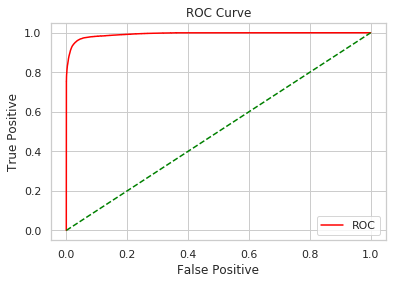

In [70]:
y_score = model.predict_proba(X_test)
y_score = y_score[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_score)
roc_auc_gb = auc(fpr_gb, tpr_gb)
print('Area under curve:', roc_auc_gb)
plt.plot(fpr_gb, tpr_gb, color = 'red', label = 'ROC')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.plot([0, 1], [0, 1], color = 'green', linestyle = '--')
plt.legend()
plt.title("ROC Curve")
plt.show()

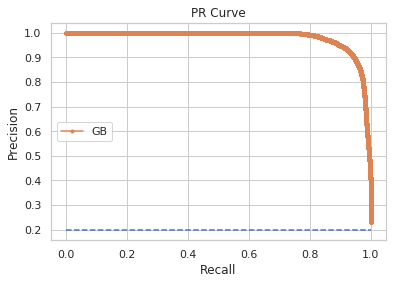

In [71]:
y_score = model.predict_proba(X_test)
y_score = y_score[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
no_skill = len(y_test[y_test == 1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker = '.', label = 'GB')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title("PR Curve")
plt.show()

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=10)
model.fit(X_train,y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

In [ ]:
y_score = model.predict_proba(X_test)
y_score = y_score[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_score)
roc_auc_gb = auc(fpr_gb, tpr_gb)
print('Area under curve:', roc_auc_gb)
plt.plot(fpr_gb, tpr_gb, color = 'red', label = 'ROC')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.plot([0, 1], [0, 1], color = 'green', linestyle = '--')
plt.legend()
plt.title("ROC Curve")
plt.show()

In [ ]:
y_score = model.predict_proba(X_test)
y_score = y_score[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
no_skill = len(y_test[y_test == 1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker = '.', label = 'SVM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title("PR Curve")
plt.show()

In [ ]:
from sklearn import preprocessing
from sklearn.linear_model  import LogisticRegression
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

model=LogisticRegression()
model.fit(X_train,y_train)

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)

print(loans['Y'].value_counts())
print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))